### GA analysis 1
Nb to analytze the GA results

In [1]:
using PyCall
using DataFrames
using Statistics
using Seaborn

#rootdir = "/home/stephane/Science/ALMA/ArrayConfig/GASS"
rootdir = "/home/stephane/alma/ArrayConfig/GASS"

push!(LOAD_PATH,"$rootdir/master/src")
using GASS
using Printf


import Random
import JLD

np= pyimport("numpy")

## directory
datadir = "$rootdir/master/data"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

┌ Info: Precompiling Seaborn [d2ef9438-c967-53ab-8060-373fdd9e13eb]
└ @ Base loading.jl:1186
┌ Info: Precompiling GASS [top-level]
└ @ Base loading.jl:1186


In [2]:
filename= "test_.jld"
dat= JLD.load(filename)
niter= length(dat["gass"])
popsize= size(dat["gass"][1].score)[1]

println(dat["gass"][1].fitness)

[-4.46978 5.28326 0.0793329 0.284608; 1.45955 2.97701 0.463107 0.151106; 1.29501 4.07024 0.180542 0.284991; 1.58506 4.61693 0.225367 0.277147; 1.4501 4.92537 0.274389 0.0723194; 1.732 4.17319 0.408086 0.318707; 1.5726 4.57691 0.268091 0.18194; 0.312699 3.45903 0.334622 0.251357; 1.77889 4.08449 0.473094 0.276248; 1.1438 5.14227 0.303337 0.252863; -1.36254 4.74555 0.259022 0.319163; 0.804647 4.40214 0.311524 0.0948134; 1.20085 3.55074 0.334622 0.251357; 1.71876 3.40114 0.431556 0.296257; 1.32144 4.19204 0.0793329 0.284608; 1.2032 5.38239 0.220643 0.323035; 0.588144 4.44291 0.394037 690.653; 1.34557 4.22096 0.276844 0.316168; 1.81936 3.61743 0.410161 0.322162; 1.68135 4.59278 0.319547 0.16596; 1.44349 5.80693 0.000622458 0.24166; 1.13447 4.24986 0.230121 0.289537; 1.38833 7.28909 0.261135 0.29277; 1.73539 3.93223 0.212256 0.212379; 1.26759 5.05632 0.224778 0.213157; 1.75436 5.13132 0.309892 0.111869; 1.59336 4.38508 0.188479 -2.04494; 1.67889 4.54959 0.273913 0.260269; 1.83786 4.90914 0.

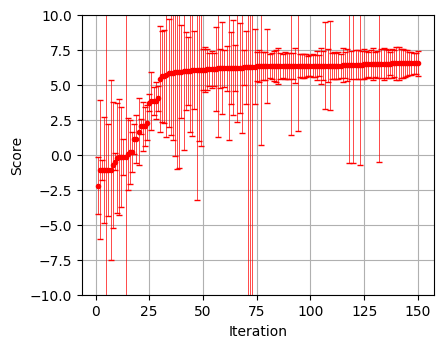

In [5]:
sc= zeros(niter)
time= zeros(niter)
sc_err= zeros(niter)

for i in 1:niter
    time[i]= i
    sc[i]= mean(dat["gass"][i].score[1])
    sc_err[i]= std(dat["gass"][i].score)
end


fig = figure(figsize=(10,8))

ax = subplot(221)
grid("on") 
plot(time, sc, ".r", markersize = 1)
errorbar(time, sc  ,yerr=  sc_err ./ 2 , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax.set_ylim([-10.0, 10.0])
xlabel("Iteration")
ylabel("Score")

show()